# Greenhouse Gas Emissions Analysis in New Zealand

## 1. Data Overview
- **Total Records:** 273,780 rows
- **Key Columns:**
  - `Year`: 2007-2022
  - `Region`: Various regions across New Zealand
  - `Category`: Industry categories like Agriculture, Energy, etc.
  - `Sub-industry`: More specific industry breakdowns
  - `Gas Type`: CO2, CH4, N2O, etc.
  - `Emissions`: Greenhouse gas emissions measured in kilotonnes

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
df = pd.read_csv(r"C:/Users/Zana/Desktop/projectData/cleaned_greenhouse_data.csv")
df.head()

,region,anzsic_descriptor,sub_industry,household_category,gas,units,magnitude,year,data_val
0,Auckland,"Forestry and logging, fishing, and agricultura...",Total,Total,Carbon dioxide equivalents,Kilotonnes,Carbon dioxide equivalents,2007,45.92
1,Auckland,"Forestry and logging, fishing, and agricultura...",Total,Total,Carbon dioxide equivalents,Kilotonnes,Carbon dioxide equivalents,2008,45.88
2,Auckland,"Forestry and logging, fishing, and agricultura...",Total,Total,Carbon dioxide equivalents,Kilotonnes,Carbon dioxide equivalents,2009,43.71
3,Auckland,"Forestry and logging, fishing, and agricultura...",Total,Total,Carbon dioxide equivalents,Kilotonnes,Carbon dioxide equivalents,2010,39.61
4,Auckland,"Forestry and logging, fishing, and agricultura...",Total,Total,Carbon dioxide equivalents,Kilotonnes,Carbon dioxide equivalents,2011,40.99


# Calculating Descriptive Statistics

In this section, we calculate descriptive statistics for the entire dataset and also group these statistics by year.

## Step 1: Descriptive Statistics for the Entire Dataset

df['data_val'].describe()


In [3]:
# Calculate descriptive statistics for the entire dataset
df['data_val'].describe()

# Calculate descriptive statistics by year
yearly_stats = df.groupby('year')['data_val'].describe()
yearly_stats

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2007,353.0,153.782748,192.597705,0.48,21.8900,74.920,213.5400,861.43
2008,355.0,159.794676,199.521101,0.47,24.2200,74.720,217.8800,868.84
2009,357.0,162.770280,203.048115,0.39,24.0600,75.590,229.1600,821.36
2010,356.0,161.178118,200.613455,0.81,23.9625,76.160,225.4025,871.91
2011,354.0,155.585650,191.339984,0.63,24.6475,75.260,219.1250,861.28
2012,355.0,157.561155,196.196706,0.55,24.5850,74.810,225.1800,870.76
2013,353.0,154.626516,190.931668,0.42,24.1600,73.280,216.4300,845.71
2014,354.0,158.514379,196.988958,0.41,23.8200,76.965,218.0850,839.25
2015,354.0,159.156158,198.460448,0.42,23.2275,76.625,224.2150,848.34


### Group by Region vs. Region-Year Descriptive Statistics

The `region_stats` output shows descriptive statistics for the `data_val` column grouped by `region`, providing a broad overview of data distribution across regions. In contrast, the `region_year_stats` output further breaks down these statistics by both `region` and `year`, offering a more detailed view of how data values vary across different regions and years.


In [4]:
region_stats = df.groupby('region')['data_val'].describe()
region_stats

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
Auckland,229.0,375.809214,278.929248,8.19,158.6700,318.540,548.4800,874.08
Bay of Plenty,344.0,214.927733,195.200837,4.71,68.3275,125.495,299.0400,713.44
Canterbury,255.0,222.718275,190.276871,5.99,70.0900,151.270,362.9500,853.34
Gisborne,363.0,45.466061,90.596483,0.31,7.4150,18.690,53.6700,875.23
Hawke's Bay,359.0,145.967967,175.949093,2.26,24.6100,85.140,208.7500,857.39
Manawatū-Whanganui,344.0,161.553779,179.256411,0.36,38.2225,81.385,278.2700,715.35
Marlborough,455.0,149.388813,216.768777,0.46,10.8800,41.340,105.2700,824.89
Nelson,272.0,84.672757,90.263477,1.30,28.0850,53.215,83.3075,347.69
Northland,312.0,99.798942,108.456931,2.82,18.9925,51.510,135.0875,398.62


In [5]:
# Group by both region and year, then calculate descriptive statistics
region_year_stats = df.groupby(['region', 'year'])['data_val'].describe()
region_year_stats

count        mean         std    min       25%      50%  \
region     year                                                            
Auckland   2007   13.0  309.950000  253.265223  26.34  165.6400  298.340   
           2008   14.0  357.442143  280.682214  26.68  182.4500  314.835   
           2009   16.0  404.883125  284.627523  34.34  228.5350  332.105   
           2010   16.0  417.498125  298.303889  35.57  224.2925  345.245   
           2011   14.0  363.162143  271.849740  31.51  177.8650  337.500   
...                ...         ...         ...    ...       ...      ...   
West Coast 2018   27.0  137.347037  212.734144   0.44    8.7550   30.850   
           2019   27.0  148.125556  234.866823   0.31    7.6550   30.120   
           2020   27.0  158.336667  260.712275   0.45    7.6950   28.470   
           2021   27.0  138.156667  215.144530   0.40    7.5900   30.340   
           2022   18.0  186.332222  258.889297   4.24   18.7400   76.270   

                      75%     max  
region     year                    
Auckland   2007  315.9300  861.43  
           2008  345.9225  868.84  
           2009  737.7150  821.36  
           2010  741.1825  871.91  
           2011  385.4500  861.28  
...                   ...     ...  
West Coast 2018  124.5550  714.61  
           2019  144.7300  802.71  
           2020  135.5300  873.32  
           2021  137.7350  736.33  
           2022  164.9550  846.88  

[272 rows x 8 columns]

### Full Display and Descriptive Statistics by Region and Year

Pandas settings are adjusted to display all rows and columns without truncation using `pd.set_option('display.max_rows', None)` and `pd.set_option('display.max_columns', None)`. Afterward, the full descriptive statistics for the `data_val` column, grouped by both `region` and `year`, are shown in `region_year_stats`, providing a detailed overview of the data distribution across all regions and years.

In [6]:
# Set pandas to display all rows
pd.set_option('display.max_rows', None)

# Set pandas to display all columns
pd.set_option('display.max_columns', None)

# Display the full descriptive statistics by region and year
region_year_stats

count        mean         std    min       25%  \
region             year                                                   
Auckland           2007   13.0  309.950000  253.265223  26.34  165.6400   
                   2008   14.0  357.442143  280.682214  26.68  182.4500   
                   2009   16.0  404.883125  284.627523  34.34  228.5350   
                   2010   16.0  417.498125  298.303889  35.57  224.2925   
                   2011   14.0  363.162143  271.849740  31.51  177.8650   
                   2012   14.0  360.547143  270.014942  34.32  181.5100   
                   2013   14.0  362.702857  271.551973  39.55  178.5700   
                   2014   16.0  419.689375  292.048890  34.22  221.7775   
                   2015   15.0  407.561333  293.881725  35.16  213.0250   
                   2016   15.0  356.362000  281.340082  10.38  117.8700   
                   2017   15.0  372.742000  300.041326   8.19  121.9000   
                   2018   14.0  346.724286  286.717012  12.31   95.6350   
                   2019   15.0  387.358000  304.304291   8.96  120.3400   
                   2020   14.0  329.610714  273.575351  10.99   90.2075   
                   2021   16.0  394.193125  306.115173   9.68  145.5125   
                   2022    8.0  413.467500  317.241433  47.78  138.8050   
Bay of Plenty      2007   22.0  192.091364  185.196962   8.51   60.1150   
                   2008   22.0  198.420000  185.782985   7.87   64.1250   
                   2009   22.0  206.114091  186.665817  13.42   68.2625   
                   2010   22.0  207.386818  186.717523   7.61   70.0150   
                   2011   22.0  206.640455  184.223691   8.93   69.1975   
                   2012   22.0  205.189091  186.735983   7.98   65.1125   
                   2013   22.0  205.590455  186.921184  13.61   64.9750   
                   2014   22.0  207.611818  188.858045   9.53   69.4275   
                   2015   22.0  214.555000  199.189268   4.71   68.9250   
                   2016   22.0  216.450909  207.139514   6.65   70.8025   
                   2017   22.0  224.344545  215.048539   7.66   70.4975   
                   2018   22.0  221.748182  209.729671   6.84   71.0575   
                   2019   22.0  227.514545  214.632429   8.18   75.9275   
                   2020   22.0  222.034091  208.817072   8.73   74.0525   
                   2021   22.0  223.684545  210.824697   7.12   72.0600   
                   2022   14.0  284.919286  229.070889   6.54  121.5425   
Canterbury         2007   17.0  231.904706  221.036653  11.54   93.4500   
                   2008   17.0  238.423529  222.147791  11.75   97.7200   
                   2009   17.0  234.225294  210.216915   9.20   96.6700   
                   2010   17.0  240.470000  225.727548   8.58  102.1800   
                   2011   17.0  235.544118  217.177482   7.63   98.9200   
                   2012   17.0  237.768824  221.095576   7.97   99.8100   
                   2013   16.0  206.400625  166.744432   7.10   80.5925   
                   2014   16.0  210.628125  168.001394   8.03   89.6675   
                   2015   16.0  210.978125  170.622515   8.83   80.7050   
                   2016   16.0  205.219375  162.451494   8.25   70.0200   
                   2017   16.0  211.843125  172.092738   6.19   65.8300   
                   2018   16.0  215.885000  177.506819   9.04   73.2200   
                   2019   16.0  210.948125  168.725171   5.99   80.5600   
                   2020   17.0  234.159412  220.054381   7.11   77.8600   
                   2021   16.0  203.008750  169.106116   6.31   69.8850   
                   2022    8.0  237.768750  205.793044  21.03   51.2300   
Gisborne           2007   23.0   39.255217   55.630783   0.48    7.4750   
                   2008   23.0   38.637826   54.143571   0.47    7.2050   
                   2009   23.0   38.543043   54.150774   0.39    7.6100   
                   2010   23.0   38.071739   52.37

### Visualizing the Distribution and Variations of Greenhouse Gas Emissions

**Histogram**: A histogram is plotted to visualize the distribution of greenhouse gas emissions across the entire dataset. Using `sns.histplot`, the distribution is displayed along with a kernel density estimate (KDE) to provide a smooth curve over the data distribution. The histogram helps in understanding the overall frequency of different emission levels.

**Boxplot**: A boxplot is created to examine how greenhouse gas emissions vary by year, highlighting any potential outliers. The `sns.boxplot` function is used to display emissions data (`data_val`) across different years (`year`). This visualization helps in identifying the spread, central tendency, and outliers in emissions for each year.


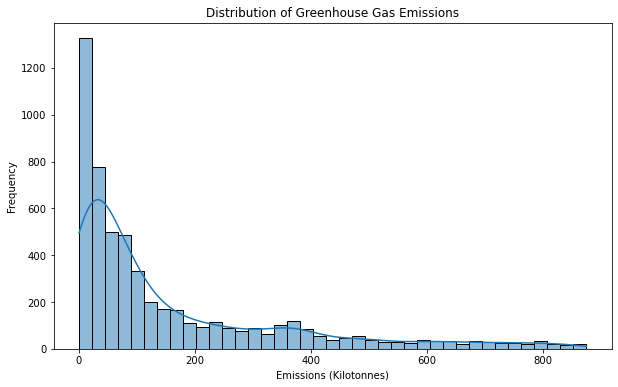

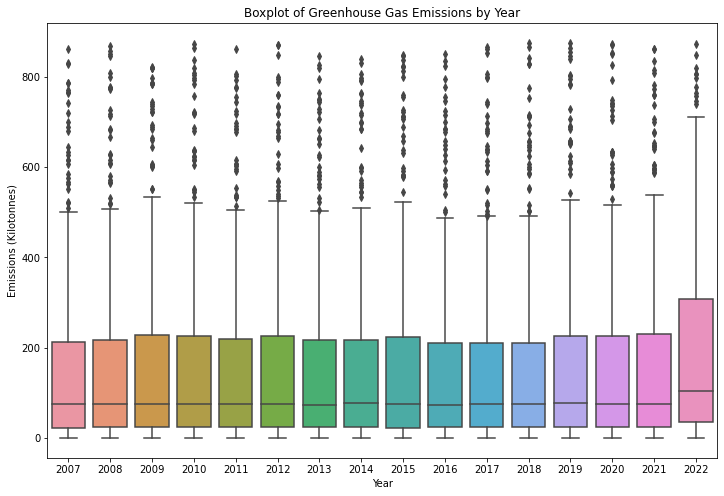

In [7]:
# Plot a histogram to visualize the distribution of emissions across the dataset
plt.figure(figsize=(10, 6))
sns.histplot(df['data_val'], kde=True)
plt.title('Distribution of Greenhouse Gas Emissions')
plt.xlabel('Emissions (Kilotonnes)')
plt.ylabel('Frequency')
plt.show()

# Plot a boxplot to see how emissions vary by year and identify any outliers
plt.figure(figsize=(12, 8))
sns.boxplot(x='year', y='data_val', data=df)
plt.title('Boxplot of Greenhouse Gas Emissions by Year')
plt.xlabel('Year')
plt.ylabel('Emissions (Kilotonnes)')
plt.show()

## Emissions Distribution by Region

The following code generates histograms for emission distributions across regions

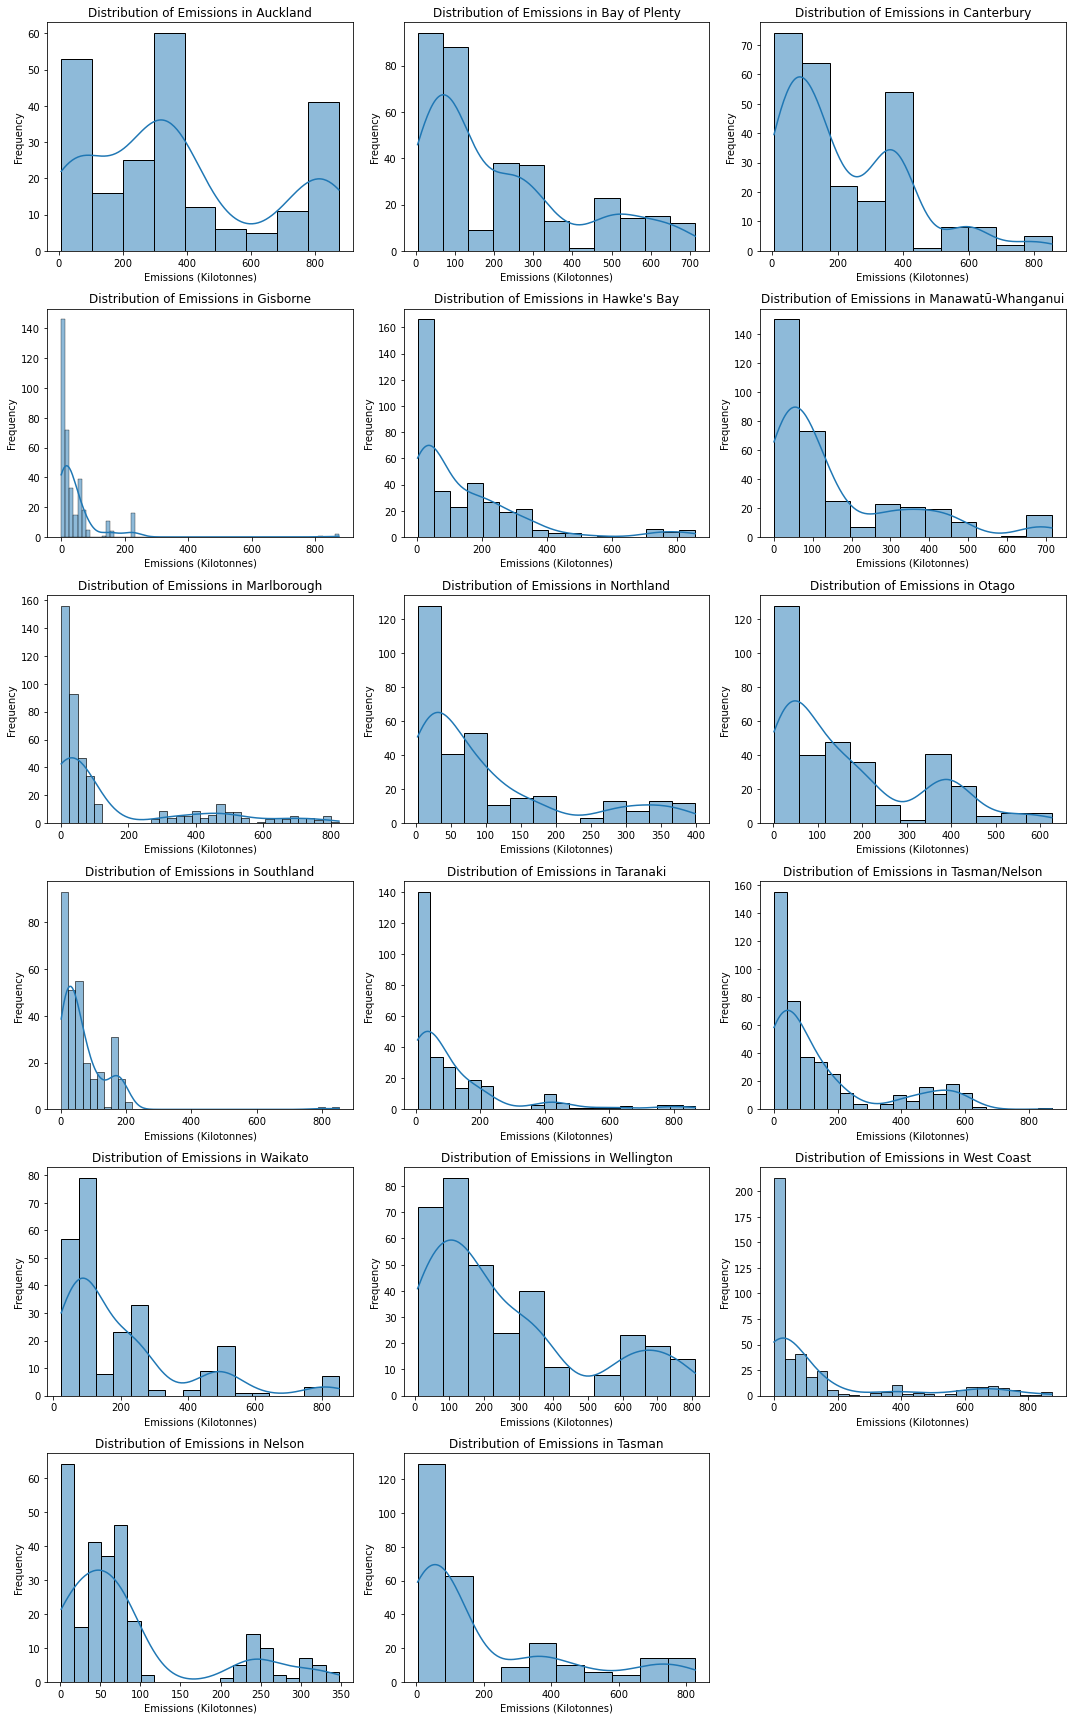

In [11]:
# Get the number of unique regions
num_regions = df['region'].nunique()

# Calculate the number of rows needed (we'll use 3 columns)
num_cols = 3
num_rows = math.ceil(num_regions / num_cols)

# Plot a histogram of emissions for each region
plt.figure(figsize=(15, num_rows * 4))

# Loop through each unique region and create a subplot
for i, region in enumerate(df['region'].unique()):
    plt.subplot(num_rows, num_cols, i + 1)
    region_data = df[df['region'] == region]
    sns.histplot(region_data['data_val'], kde=True)
    plt.title(f'Distribution of Emissions in {region}')
    plt.xlabel('Emissions (Kilotonnes)')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Bar Charts of Emissions by Region and Year

This code generates a grid of bar charts to visualize emissions data by region and year:

1. **Calculate Number of Subplots:**
Determine the number of unique regions.
Calculate the required number of rows and columns for the subplot grid.

2. **Plot Bar Charts:**
Create a bar chart for each region showing emissions across different years.
Each subplot displays emissions data with years on the x-axis and emissions (in kilotonnes) on the y-axis.
Rotate x-axis labels for better readability.

The histograms are arranged in a grid format, making it easy to compare emissions across regions and years.


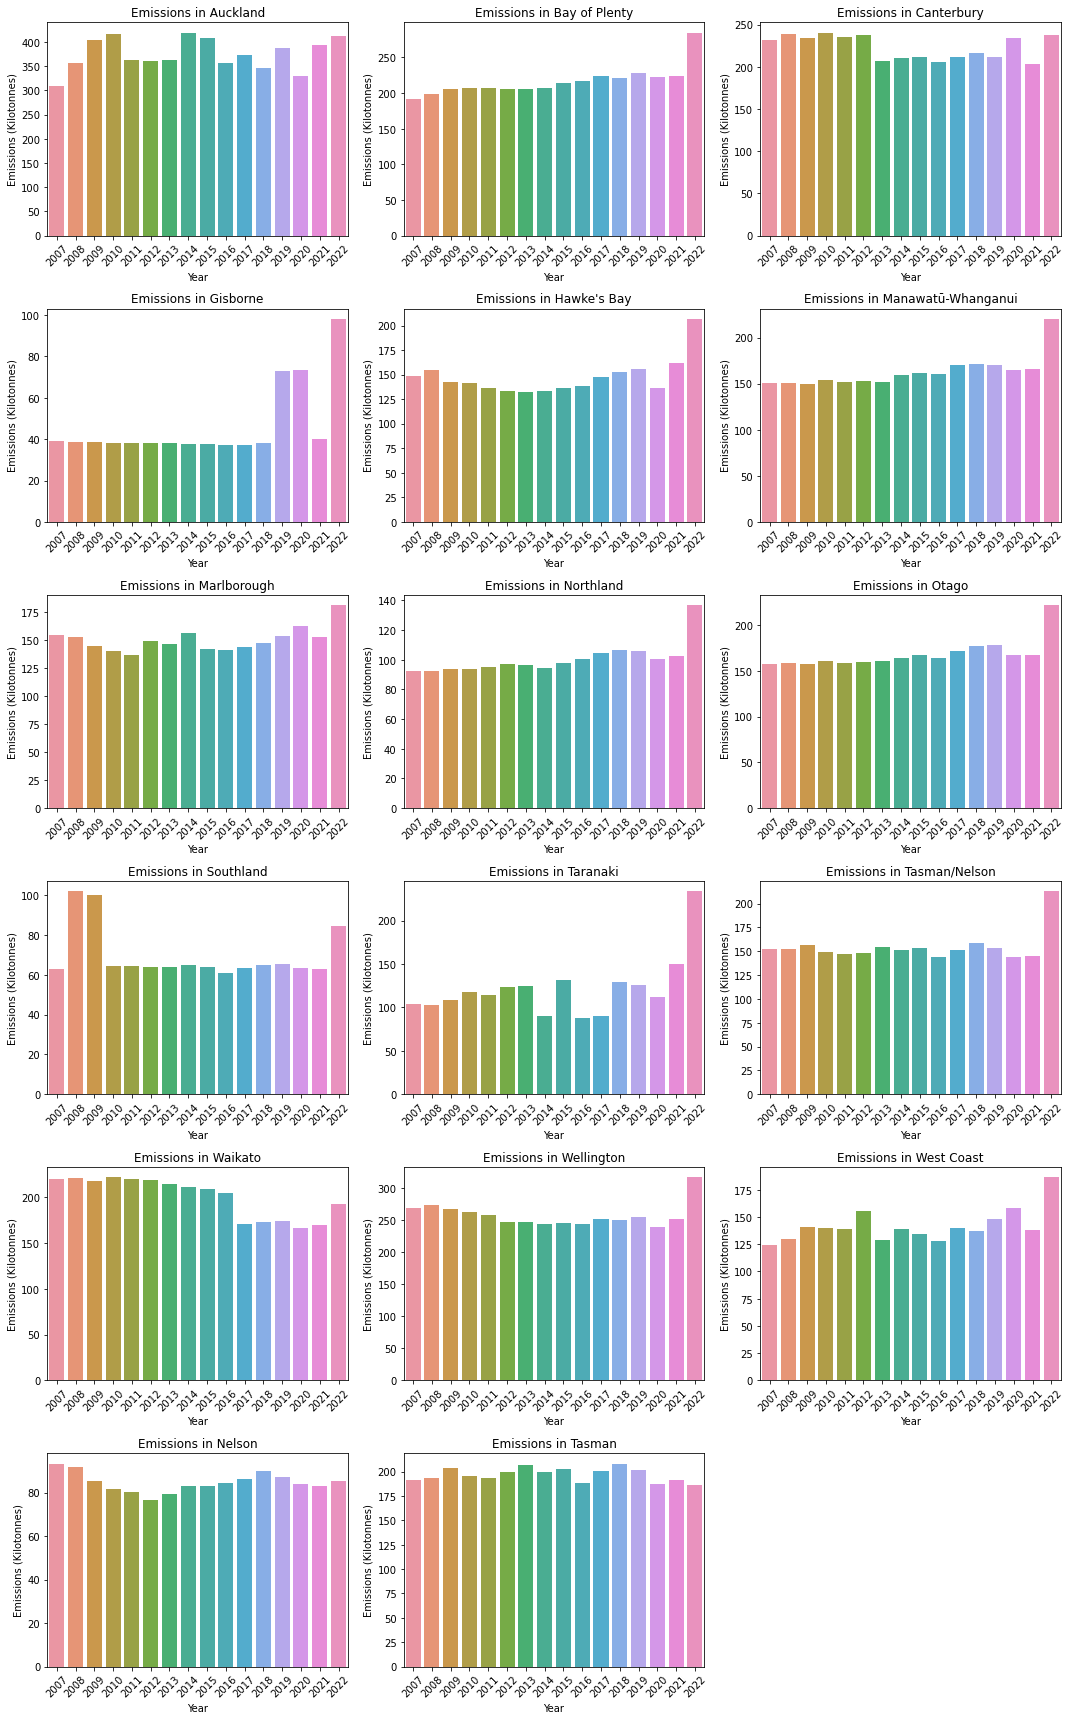

In [13]:
# Get the number of unique regions
num_regions = df['region'].nunique()

# Calculate the number of rows needed (we'll use 3 columns)
num_cols = 3
num_rows = math.ceil(num_regions / num_cols)

# Plot bar charts of emissions by region and year
plt.figure(figsize=(15, num_rows * 4))

# Loop through each unique region and create a subplot
for i, region in enumerate(df['region'].unique()):
    plt.subplot(num_rows, num_cols, i + 1)
    region_data = df[df['region'] == region]
    sns.barplot(x='year', y='data_val', data=region_data, ci=None)
    plt.title(f'Emissions in {region}')
    plt.xlabel('Year')
    plt.ylabel('Emissions (Kilotonnes)')
    plt.xticks(rotation=45)  # Rotate the year labels for better readability

plt.tight_layout()
plt.show()

## Correlation Matrix

This code calculates and visualizes the correlation matrix for numerical columns in the dataset. The resulting heatmap illustrates the relationships between variables, with annotations and a color gradient indicating the strength of correlations.

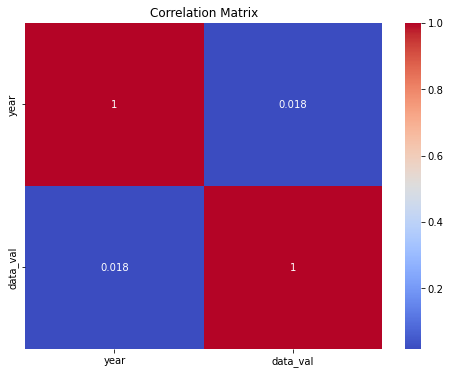

In [14]:
# Example of creating a correlation matrix if there are other numerical columns
corr_matrix = df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Correlation of Year and Emissions by Region

This code calculates and visualizes the correlation between year and emissions for each region:

**Compute Correlations:** Calculate the correlation between `year` and `data_val` for each region.

**Create DataFrame:** Convert the results into a DataFrame and sort by correlation values.

**Plot Results:** Use a bar plot to show the correlation coefficients for each region.

The resulting bar plot helps in understanding how emissions trend over time across different regions.


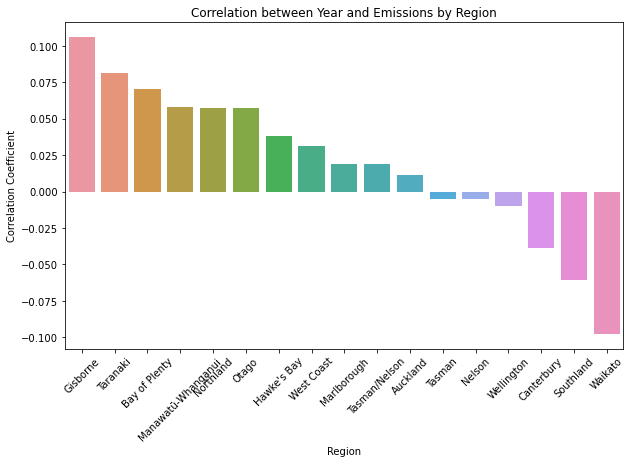

In [15]:
# Initialize a dictionary to store correlations by region
region_correlations = {}

# Calculate correlation between year and data_val for each region
for region in df['region'].unique():
    region_data = df[df['region'] == region]
    correlation = region_data[['year', 'data_val']].corr().iloc[0, 1]
    region_correlations[region] = correlation

# Convert the dictionary to a DataFrame for easier visualization
region_corr_df = pd.DataFrame.from_dict(region_correlations, orient='index', columns=['Correlation'])

# Sort by correlation to make visualization clearer
region_corr_df = region_corr_df.sort_values(by='Correlation', ascending=False)

# Plot the correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=region_corr_df.index, y='Correlation', data=region_corr_df)
plt.xticks(rotation=45)
plt.title('Correlation between Year and Emissions by Region')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Region')
plt.show()

## Trend Analysis of Emissions

This code performs trend analysis for emissions data using Ordinary Least Squares (OLS) regression:

- **Function Definition:** `plot_trend` function plots actual emissions data and fits a regression line for a specified region.
- **Model Fitting:** The function uses `statsmodels` to fit an OLS regression model, predicts emissions, and plots both actual data and the trend line.
- **Analyze Regions:** The function is applied to analyze emissions trends for Gisborne and Taranaki, displaying regression summaries for each.

The output includes visual plots and detailed regression results for each selected region.


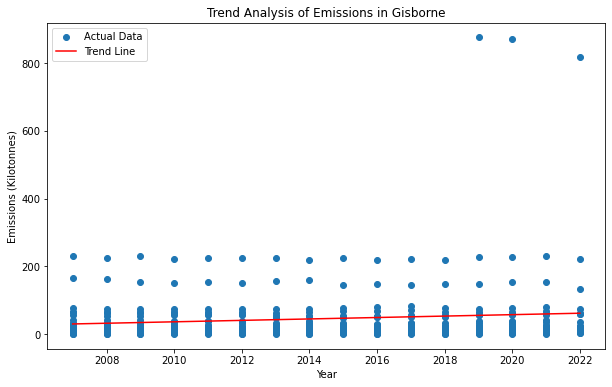

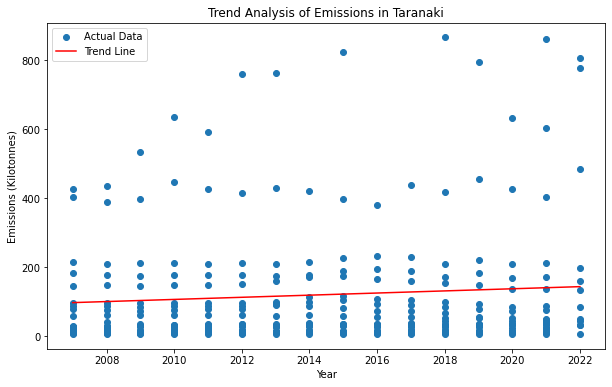

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:               data_val   R-squared:                       0.011
 Model:                            OLS   Adj. R-squared:                  0.008
 Method:                 Least Squares   F-statistic:                     4.094
 Date:                Sat, 17 Aug 2024   Prob (F-statistic):             0.0438
 Time:                        16:24:24   Log-Likelihood:                -2148.4
 No. Observations:                 363   AIC:                             4301.
 Df Residuals:                     361   BIC:                             4309.
 Df Model:                           1                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------------------------

In [16]:
import statsmodels.api as sm

# Function to plot trend and fit a regression line
def plot_trend(region_name):
    region_data = df[df['region'] == region_name]
    X = sm.add_constant(region_data['year'])  # Adds a constant term to the predictor
    y = region_data['data_val']

    model = sm.OLS(y, X).fit()  # Fit an Ordinary Least Squares (OLS) regression model
    predictions = model.predict(X)

    plt.figure(figsize=(10, 6))
    plt.scatter(region_data['year'], region_data['data_val'], label='Actual Data')
    plt.plot(region_data['year'], predictions, color='red', label='Trend Line')
    plt.title(f'Trend Analysis of Emissions in {region_name}')
    plt.xlabel('Year')
    plt.ylabel('Emissions (Kilotonnes)')
    plt.legend()
    plt.show()

    # Displaying the regression results summary
    return model.summary()

# Analyze the trend for Gisborne and Taranaki
gisborne_summary = plot_trend('Gisborne')
taranki_summary = plot_trend('Taranaki')

gisborne_summary, taranki_summary

## Cluster Analysis of Emissions Trends

This code performs cluster analysis to group regions based on their emissions trends:

- **Data Preparation:** 
  - Pivot the data to create a matrix of average emissions per year for each region.
  - Standardize the data using `StandardScaler`.

- **Clustering:**
  - Apply KMeans clustering to group regions into clusters (3 clusters in this case).

- **Visualization:**
  - Plot the clusters to visualize the grouping of regions based on their emissions trends.

The scatter plot displays regions grouped into clusters, highlighting similarities in their emissions trends.

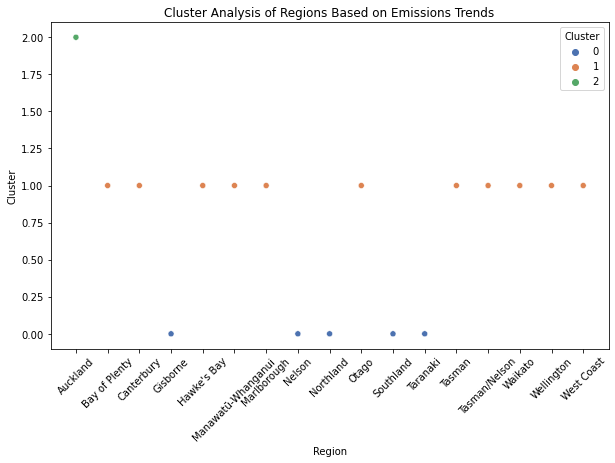

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Prepare the data for clustering
region_trends = df.pivot_table(values='data_val', index='year', columns='region', aggfunc=np.mean).fillna(0).T
scaler = StandardScaler()
region_trends_scaled = scaler.fit_transform(region_trends)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
region_trends['Cluster'] = kmeans.fit_predict(region_trends_scaled)

# Add cluster information back to the original DataFrame
df['Cluster'] = df['region'].map(region_trends['Cluster'])

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=region_trends, x=region_trends.index, y='Cluster', hue='Cluster', palette='deep')
plt.title('Cluster Analysis of Regions Based on Emissions Trends')
plt.xlabel('Region')
plt.ylabel('Cluster')
plt.xticks(rotation=45)
plt.show()

## Year-on-Year Emissions Change Analysis

This analysis examines the year-on-year percentage changes in emissions for selected regions:

- **Calculate Changes:** Compute year-on-year percentage changes in emissions for each region.
  
- **Visualization:**
  - Plot the percentage change over time for regions with significant correlations, such as Waikato and Southland.
  - The line plot shows how emissions have changed annually, with a reference line at 0% change for context.

The plot provides insight into the trends and fluctuations in emissions for the selected regions.

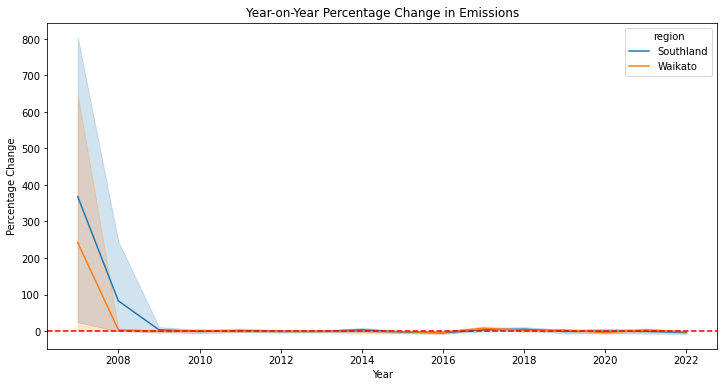

In [19]:
df['yearly_change'] = df.groupby('region')['data_val'].pct_change() * 100

# Focus on regions with significant correlations, e.g., Waikato and Southland
plt.figure(figsize=(12, 6))
sns.lineplot(data=df[df['region'].isin(['Waikato', 'Southland'])], x='year', y='yearly_change', hue='region')
plt.title('Year-on-Year Percentage Change in Emissions')
plt.xlabel('Year')
plt.ylabel('Percentage Change')
plt.axhline(0, color='red', linestyle='--')
plt.show()

## Outlier Analysis

- **Visualization:** Boxplot of emissions by region to identify potential outliers.
- **Detection:** Outliers are determined using the IQR method.

The boxplot highlights data distribution and outliers, while the IQR method flags unusual emissions values.

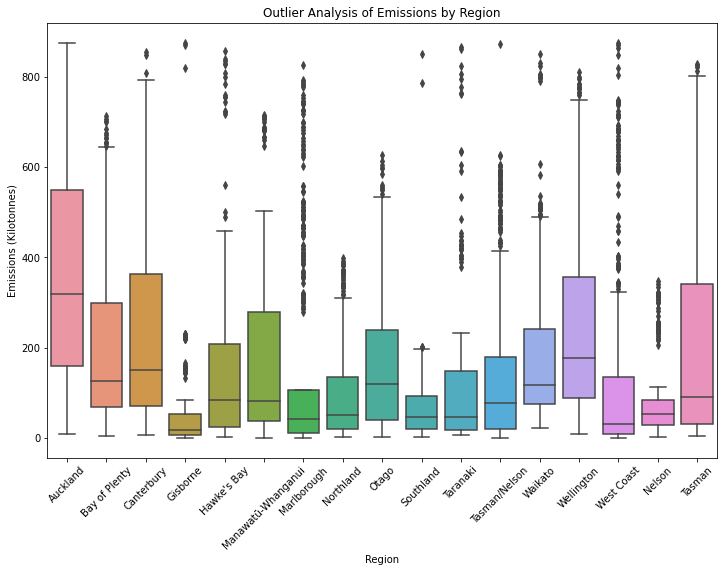

,region,anzsic_descriptor,sub_industry,household_category,gas,units,magnitude,year,data_val,Cluster,yearly_change
225,Auckland,Agriculture,Total,Total,Carbon dioxide equivalents,Kilotonnes,Carbon dioxide equivalents,2008,868.84,2,1665.576102
226,Auckland,Agriculture,Total,Total,Carbon dioxide equivalents,Kilotonnes,Carbon dioxide equivalents,2009,743.31,2,-14.448000
227,Auckland,Agriculture,Total,Total,Carbon dioxide equivalents,Kilotonnes,Carbon dioxide equivalents,2010,796.72,2,7.185427
228,Auckland,Agriculture,Total,Total,Carbon dioxide equivalents,Kilotonnes,Carbon dioxide equivalents,2011,861.28,2,8.103223
229,Auckland,Agriculture,Total,Total,Carbon dioxide equivalents,Kilotonnes,Carbon dioxide equivalents,2012,870.09,2,1.022896
230,Auckland,Agriculture,Total,Total,Carbon dioxide equivalents,Kilotonnes,Carbon dioxide equivalents,2013,845.71,2,-2.802009
231,Auckland,Agriculture,Total,Total,Carbon dioxide equivalents,Kilotonnes,Carbon dioxide equivalents,2014,763.19,2,-9.757482
232,Auckland,Agriculture,Total,Total,Carbon dioxide equivalents,Kilotonnes,Carbon dioxide equivalents,2015,848.34,2,11.157117
233,Auckland,Agriculture,Total,Total,Carbon dioxide equivalents,Kilotonnes,Carbon dioxide equivalents,2018,840.98,2,-0.867577
234,Auckland,Agriculture,Total,Total,Carbon dioxide equivalents,Kilotonnes,Carbon dioxide equivalents,2020,850.96,2,1.186711


In [20]:
# Outlier Analysis
plt.figure(figsize=(12, 8))
sns.boxplot(x='region', y='data_val', data=df)
plt.title('Outlier Analysis of Emissions by Region')
plt.xlabel('Region')
plt.ylabel('Emissions (Kilotonnes)')
plt.xticks(rotation=45)
plt.show()

# Detecting outliers
Q1 = df['data_val'].quantile(0.25)
Q3 = df['data_val'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['data_val'] < (Q1 - 1.5 * IQR)) | (df['data_val'] > (Q3 + 1.5 * IQR))]

outliers

## Descriptive Statistics by ANZSIC Descriptor

- **Objective:** Compute descriptive statistics (e.g., mean, median) for emissions data grouped by `anzsic_descriptor`.
- **Result:** `anzsic_stats` provides a summary of statistical measures for each descriptor.

The output gives insights into the distribution of emissions across different ANZSIC categories.

In [22]:
# Calculate descriptive statistics for emissions by anzsic_descriptor
anzsic_stats = df.groupby('anzsic_descriptor')['data_val'].describe()
anzsic_stats

,count,mean,std,min,25%,50%,75%,max
anzsic_descriptor,,,,,,,,
Agriculture,56.0,579.098393,155.824580,392.88,451.2850,494.885,691.2950,870.09
"Agriculture, forestry, and fishing",54.0,595.056667,111.224921,454.96,506.0500,561.590,680.9650,874.08
Construction,240.0,93.170833,123.906756,8.75,26.1075,44.890,101.5450,677.99
"Electricity, gas, water, and waste services",637.0,124.373595,169.685360,0.29,15.8800,60.500,166.3000,861.43
"Forestry and logging, fishing, and agricultural support services",225.0,51.680400,28.254972,5.84,32.8600,44.590,72.1800,113.82
Goods-producing industries,176.0,297.286534,209.769825,52.13,104.8450,238.180,448.2150,726.42
"Government and defence, education and health care",225.0,76.498933,92.958303,6.51,18.9500,39.430,98.9900,415.98
Households,1002.0,136.698453,184.283633,1.30,14.0275,65.230,179.2450,850.25
Manufacturing,160.0,211.004562,197.766791,18.77,97.0325,147.145,268.3325,861.05


## Total Emissions by ANZSIC Descriptor

- **Objective:** Calculate and visualize the total emissions for each `anzsic_descriptor`.
- **Plot:** A bar chart displays total emissions for each ANZSIC descriptor, with descriptors sorted in descending order.

The bar chart highlights which ANZSIC descriptors contribute most to total emissions.

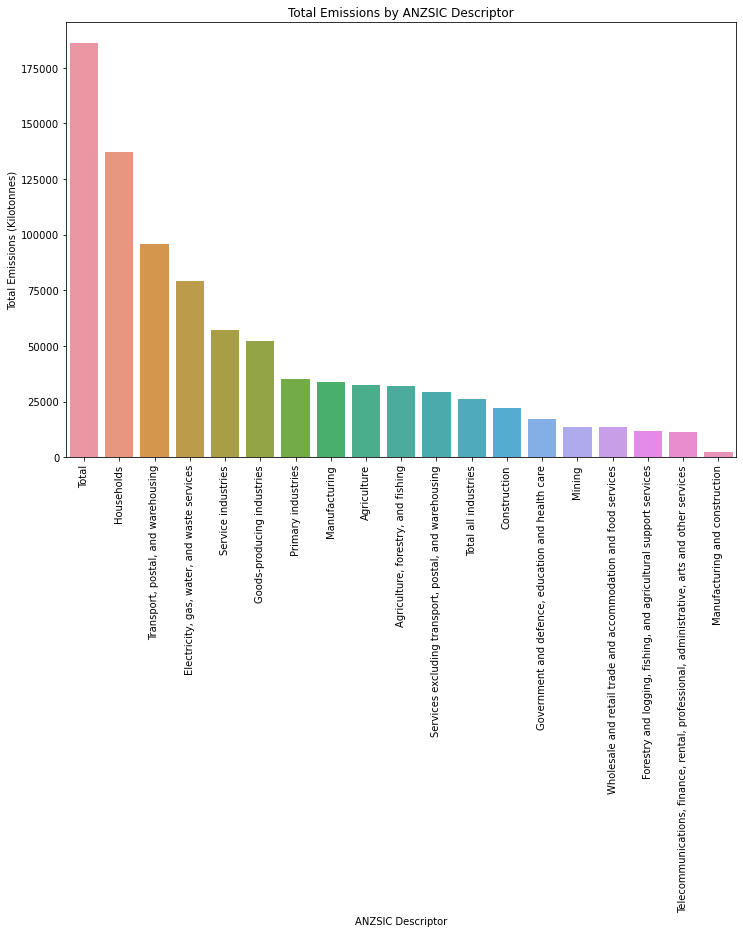

In [24]:
# Calculate total emissions by anzsic_descriptor
total_emissions_by_anzsic = df.groupby('anzsic_descriptor')['data_val'].sum().sort_values(ascending=False)

# Plotting the total emissions by anzsic_descriptor
plt.figure(figsize=(12, 8))
sns.barplot(x=total_emissions_by_anzsic.index, y=total_emissions_by_anzsic.values)
plt.title('Total Emissions by ANZSIC Descriptor')
plt.xlabel('ANZSIC Descriptor')
plt.ylabel('Total Emissions (Kilotonnes)')
plt.xticks(rotation=90)
plt.show()

## Emissions Trends by ANZSIC Descriptor

- **Objective:** Analyze and visualize emissions trends for the top 10 ANZSIC descriptors.
- **Method:**
  - Calculate total emissions by ANZSIC descriptor and select the top 10.
  - Plot trends over time for these top sectors.

The line plot shows how emissions have changed over the years for the most significant ANZSIC sectors.

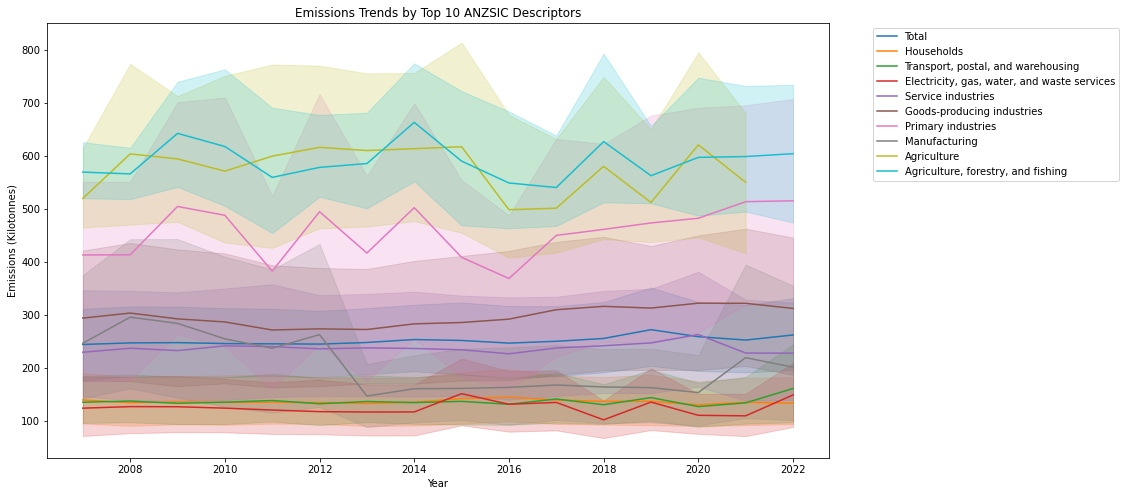

In [35]:
# Trend Analysis by ANZSIC Descriptor
# Calculate total emissions for each ANZSIC descriptor
total_emissions_by_anzsic = df.groupby('anzsic_descriptor')['data_val'].sum().sort_values(ascending=False)

# Select the top 10 contributing sectors
top_anzsic_descriptors = total_emissions_by_anzsic.head(10).index

# Plot emissions trends over time for the top sectors
plt.figure(figsize=(14, 8))

for anzsic in top_anzsic_descriptors:
    subset = df[df['anzsic_descriptor'] == anzsic]
    sns.lineplot(x='year', y='data_val', data=subset, label=anzsic)

plt.title('Emissions Trends by Top 10 ANZSIC Descriptors')
plt.xlabel('Year')
plt.ylabel('Emissions (Kilotonnes)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Emissions Trends by ANZSIC Category

- **Objective:** Visualize emissions trends for grouped ANZSIC descriptors by category.
- **Method:**
  - Define categories and their respective descriptors.
  - Plot emissions trends over time for each category, with separate line plots for each descriptor.

The line plots reveal how emissions trends vary within each category, helping to understand sector-specific changes.

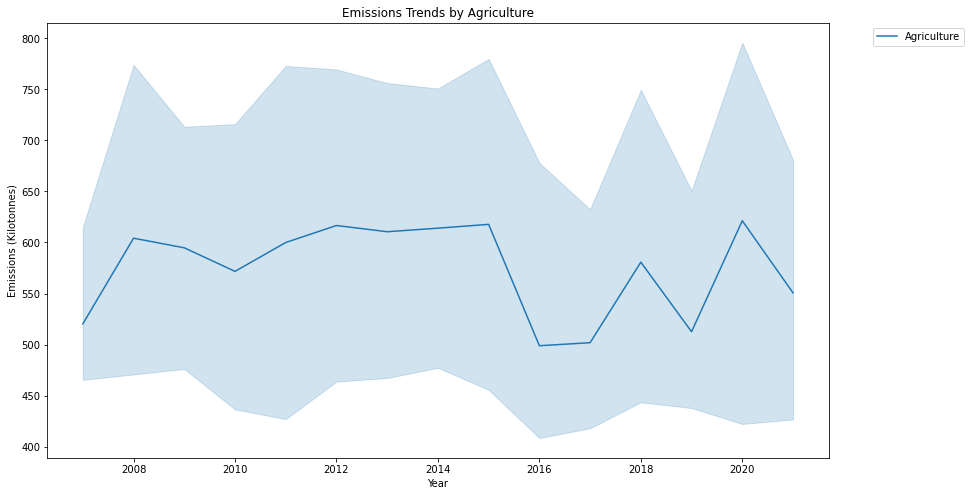

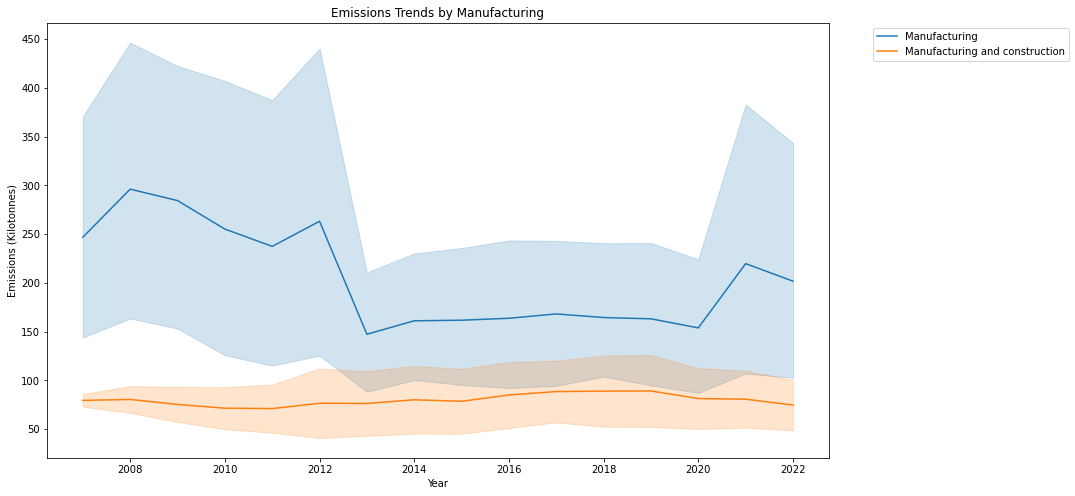

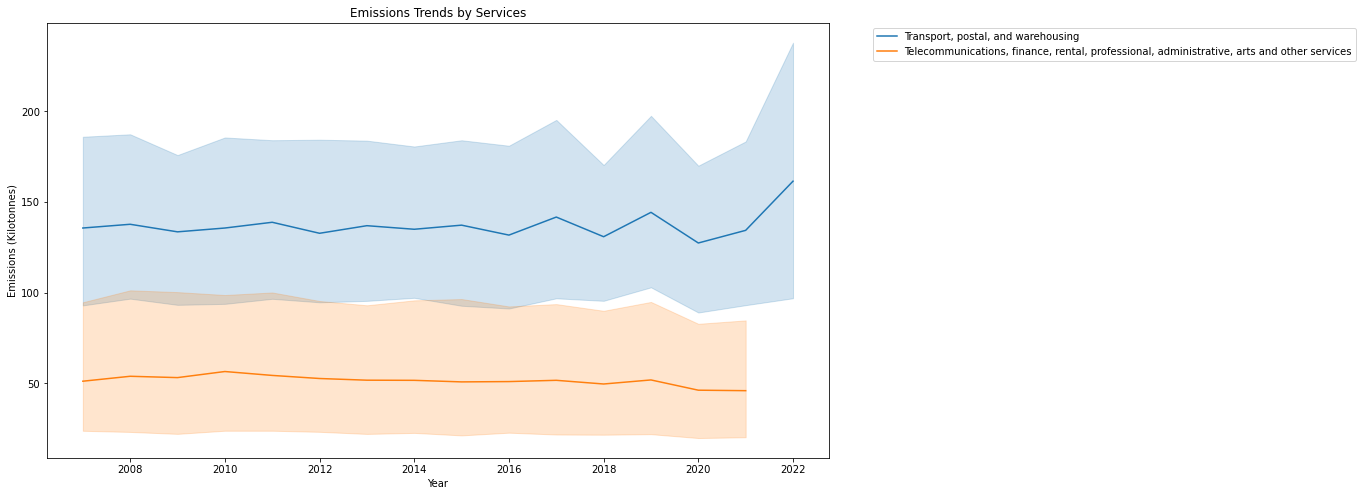

In [34]:
# Example: Categorizing ANZSIC descriptors (You may need to adjust this based on actual categories)
categories = {
    'Agriculture': ['Agriculture', 'Forestry and logging', 'Fishing'],
    'Manufacturing': ['Manufacturing', 'Manufacturing and construction'],
    'Services': ['Wholesale and retail trade', 'Transport, postal, and warehousing', 'Telecommunications, finance, rental, professional, administrative, arts and other services']
}

# Plot each category separately
for category, descriptors in categories.items():
    plt.figure(figsize=(14, 8))
    for anzsic in descriptors:
        subset = df[df['anzsic_descriptor'] == anzsic]
        sns.lineplot(x='year', y='data_val', data=subset, label=anzsic)

    plt.title(f'Emissions Trends by {category}')
    plt.xlabel('Year')
    plt.ylabel('Emissions (Kilotonnes)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

## Correlation Analysis by ANZSIC Descriptor

- **Objective:** Analyze the correlation between `year` and `data_val` for each ANZSIC descriptor.
- **Method:**
  - Calculate correlations for each descriptor.
  - Convert results to a DataFrame, sort by correlation, and plot.

The bar plot displays how emissions are correlated with time across different ANZSIC descriptors.

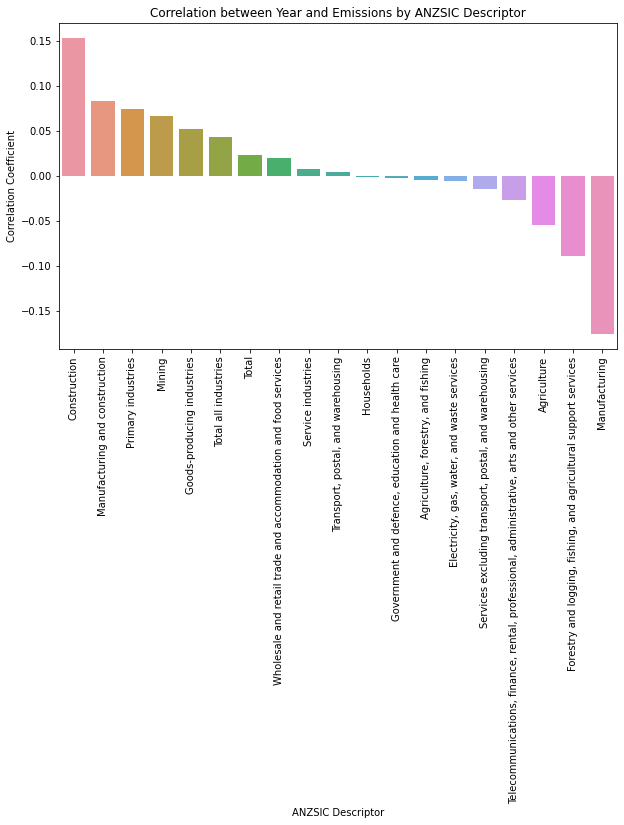

In [28]:
# Initialize a dictionary to store correlations by anzsic_descriptor
anzsic_correlations = {}

# Calculate correlation between year and data_val for each anzsic_descriptor
for anzsic in df['anzsic_descriptor'].unique():
    anzsic_data = df[df['anzsic_descriptor'] == anzsic]
    correlation = anzsic_data[['year', 'data_val']].corr().iloc[0, 1]
    anzsic_correlations[anzsic] = correlation

# Convert the dictionary to a DataFrame for easier visualization
anzsic_corr_df = pd.DataFrame.from_dict(anzsic_correlations, orient='index', columns=['Correlation'])

# Sort by correlation to make visualization clearer
anzsic_corr_df = anzsic_corr_df.sort_values(by='Correlation', ascending=False)

# Plot the correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=anzsic_corr_df.index, y='Correlation', data=anzsic_corr_df)
plt.xticks(rotation=90)
plt.title('Correlation between Year and Emissions by ANZSIC Descriptor')
plt.ylabel('Correlation Coefficient')
plt.xlabel('ANZSIC Descriptor')
plt.show()

## Outlier Analysis by ANZSIC Descriptor

- **Objective:** Identify and visualize outliers in emissions data for each ANZSIC descriptor.
- **Method:**
  - Use a boxplot to visualize emissions distributions and detect outliers.
  - Calculate outliers using the IQR method and count them by ANZSIC descriptor.

The boxplot highlights outliers for each descriptor, while the count provides a summary of outliers across categories.

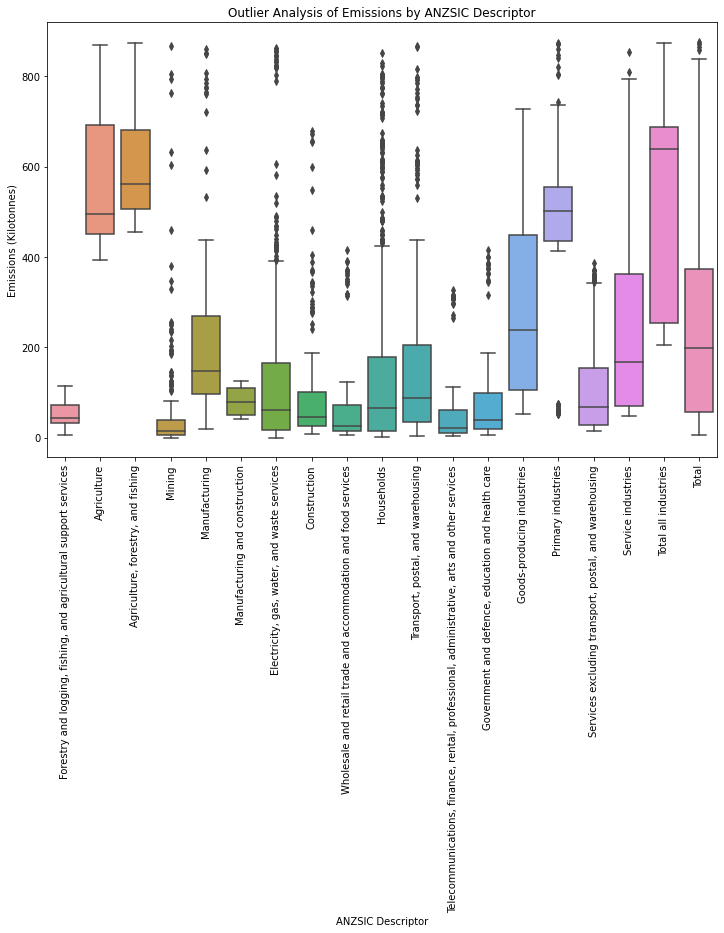

anzsic_descriptor
Agriculture                                     26
Agriculture, forestry, and fishing              34
Construction                                     6
Electricity, gas, water, and waste services     20
Goods-producing industries                      33
Households                                      65
Manufacturing                                   14
Mining                                           6
Primary industries                              26
Service industries                              18
Total                                          108
Total all industries                            33
Transport, postal, and warehousing              30
dtype: int64

In [30]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='anzsic_descriptor', y='data_val', data=df)
plt.title('Outlier Analysis of Emissions by ANZSIC Descriptor')
plt.xlabel('ANZSIC Descriptor')
plt.ylabel('Emissions (Kilotonnes)')
plt.xticks(rotation=90)
plt.show()

# Detecting outliers
Q1 = df['data_val'].quantile(0.25)
Q3 = df['data_val'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['data_val'] < (Q1 - 1.5 * IQR)) | (df['data_val'] > (Q3 + 1.5 * IQR))]

outliers_by_anzsic = outliers.groupby('anzsic_descriptor').size()
outliers_by_anzsic

## Linear Regression Analysis

- **Objective:** Analyze the trend of emissions over time using linear regression.
- **Method:**
  - Perform linear regression to find the slope, intercept, R-squared value, and p-value.

The results show the regression line's slope and intercept, how well the model fits the data (R-squared), and the statistical significance (p-value).

In [32]:
from scipy import stats

# Perform a linear regression to check the trend of emissions over the years
slope, intercept, r_value, p_value, std_err = stats.linregress(df['year'], df['data_val'])

# Displaying the slope, intercept, R-squared value, and p-value directly
slope, intercept, r_value**2, p_value

(0.782299306717126,
 -1415.6563440010852,
 0.0003220835770094094,
 0.18120777775386557)

## Conclusion
**Overall Trend:** New Zealand's greenhouse gas emissions show a mixed trend with recent reductions, particularly in CO2.

**Regional Focus:** Strategies to reduce emissions should prioritize high-emission regions like Waikato and high-emission industries like Agriculture.

**Future Considerations:** Ongoing monitoring and industry-specific strategies are crucial for meeting environmental targets.